Adaptação da tese "Analytic Signal Processing for Financial Time Series" do autor Thuy Trang Nguyen, originalmente implementada em R

## Exemplo 5.0.1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

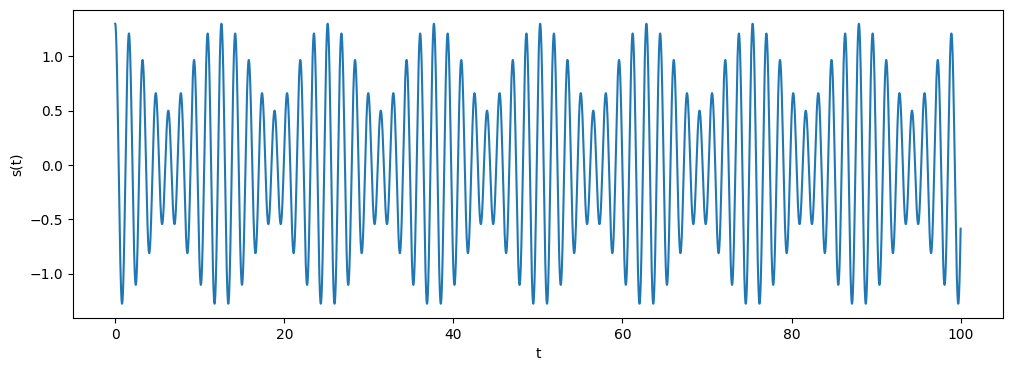

In [2]:
#Soma de cossenos
t = np.linspace(0,100,10000)
s = 0.4*np.cos(3.5*t) + 0.9*np.cos(4*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

### Implementação da FFT (Fast Fourier Transform)

In [3]:
z = np.fft.fft(s)
z[0] = 0     #Geralmente, o primeiro elemento de uma transformada de Fourier representa a componente de frequência zero.
z[5000:10000] = np.zeros(5000)     #Isso pode ser visto como uma maneira de remover ou atenuar as componentes de frequência correspondentes a esses índices. Em muitos casos, isso é feito para remover ruídos ou frequências indesejadas.
w = np.fft.ifft(z) / np.size(t)     #transformada inversa

amp = 2*np.abs(w)    #amp = np.sqrt((np.real(w)**2) + (np.imag(w)**2))

fase = np.arctan2(np.imag(w),np.real(w))

In [4]:
sinal_hilbert = hilbert(s)
fase_hilbert = np.angle(sinal_hilbert)
   #A transformada de Hilbert tem o efeito de transformar o sinal em um deslocamento de fase de +/- 90 graus de todos os seus componentes. Como resultado, realizar a transformada de Hilbert no sinal apenas altera sua fase, enquanto a amplitude e a frequência permanecem inalteradas.

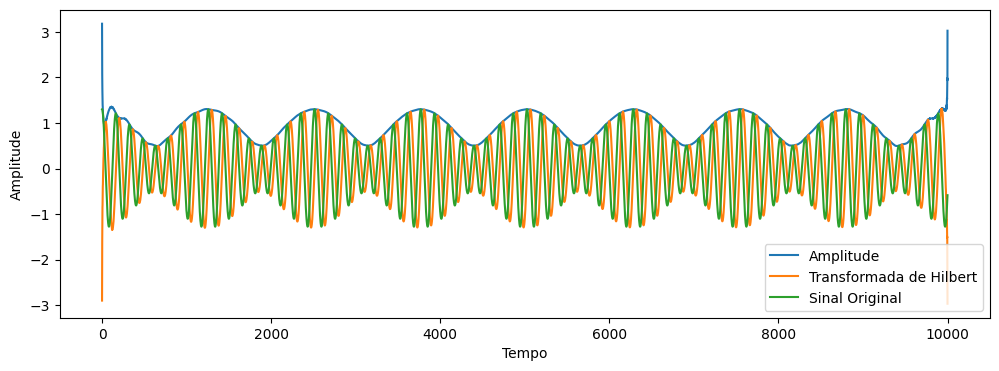

In [5]:
plt.figure(figsize=(12,4))
plt.ylabel('Amplitude')
plt.xlabel('Tempo')
plt.plot(10000*amp, label='Amplitude')
plt.plot(np.imag(sinal_hilbert), label='Transformada de Hilbert')
plt.plot(s, label='Sinal Original')
plt.legend(loc='lower right')
plt.show()

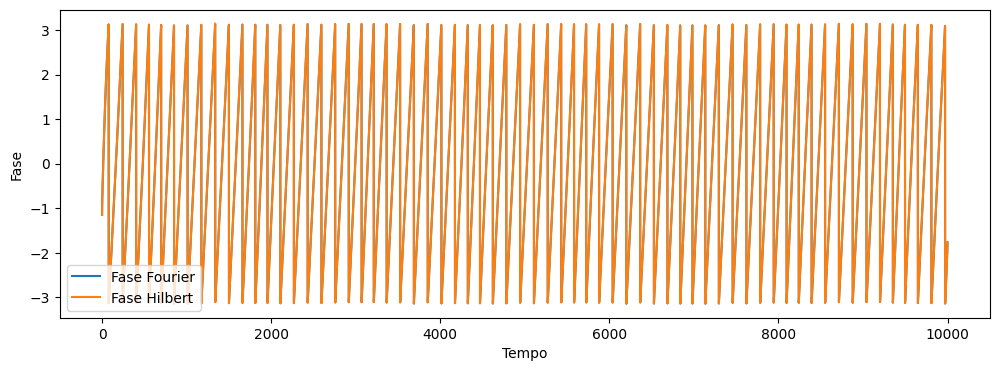

In [6]:
plt.figure(figsize=(12,4))
plt.ylabel('Fase')
plt.xlabel('Tempo')
plt.plot(fase, label='Fase Fourier')
plt.plot(fase_hilbert, label='Fase Hilbert')
plt.legend()
plt.show()

In [7]:
fase

array([-1.148579  , -0.90407823, -0.89093564, ..., -1.91506314,
       -1.90033627, -1.76474287])

In [8]:
fase_hilbert   #se sobrepoem no gráfico mas há uma leve diferença nos valores de fase
#isso deve-se ao fato do sinal não apresentar componentes complexas de amplitude e frequência, sendo estacionário

array([-1.14940585, -0.90522408, -0.89202087, ..., -1.91651817,
       -1.90174262, -1.76573743])

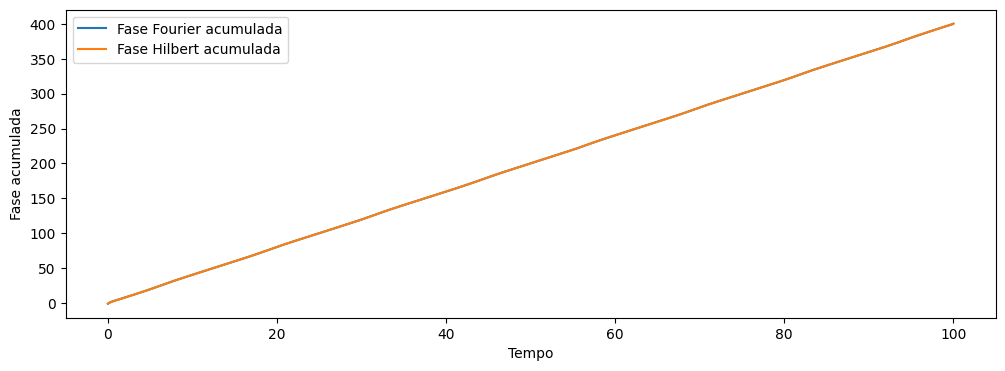

In [9]:
unwrapped_phase = np.unwrap(fase)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

plt.figure(figsize=(12,4))
plt.ylabel('Fase acumulada')
plt.xlabel('Tempo')
plt.plot(t, unwrapped_phase, label='Fase Fourier acumulada')
plt.plot(t, unwrapped_phase_hilbert, label='Fase Hilbert acumulada')
plt.legend()
plt.show()   

In [10]:
unwrapped_phase_hilbert

array([ -1.14940585,  -0.90522408,  -0.89202087, ..., 400.20734149,
       400.22211704, 400.35812223])

In [11]:
unwrapped_phase   #leve diferença

array([ -1.148579  ,  -0.90407823,  -0.89093564, ..., 400.20879652,
       400.22352339, 400.35911679])

# Exemplo 5.0.2.

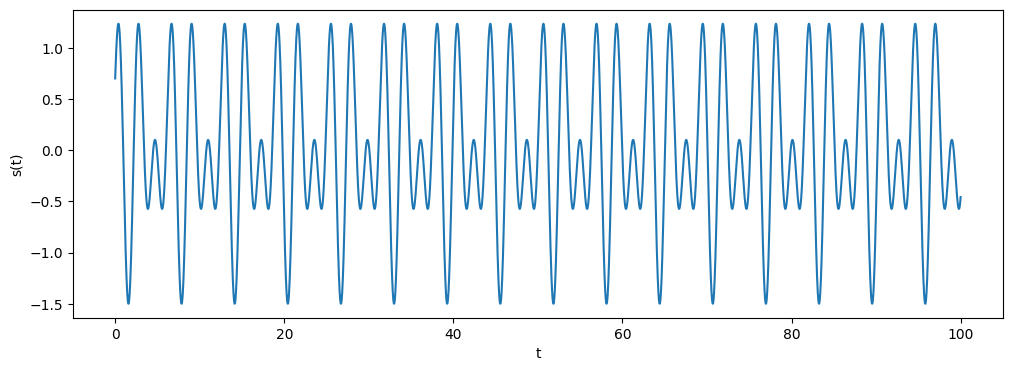

In [12]:
#Soma de cosseno e seno
s = 0.7 * np.cos(2*t) + 0.8 * np.sin(3*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

In [13]:
z = np.fft.fft(s)
z[0] = 0
z[5000:10000] = np.zeros(5000)

w = np.fft.ifft(z) / np.size(t)

amp = 2 * np.abs(w)

fase = np.arctan2(np.imag(w), np.real(w))
unwrapped_phase = np.unwrap(fase)

In [14]:
sinal_hilbert = hilbert(s)
fase_hilbert = np.angle(sinal_hilbert)
unwrapped_phase_hilbert = np.unwrap(fase_hilbert)

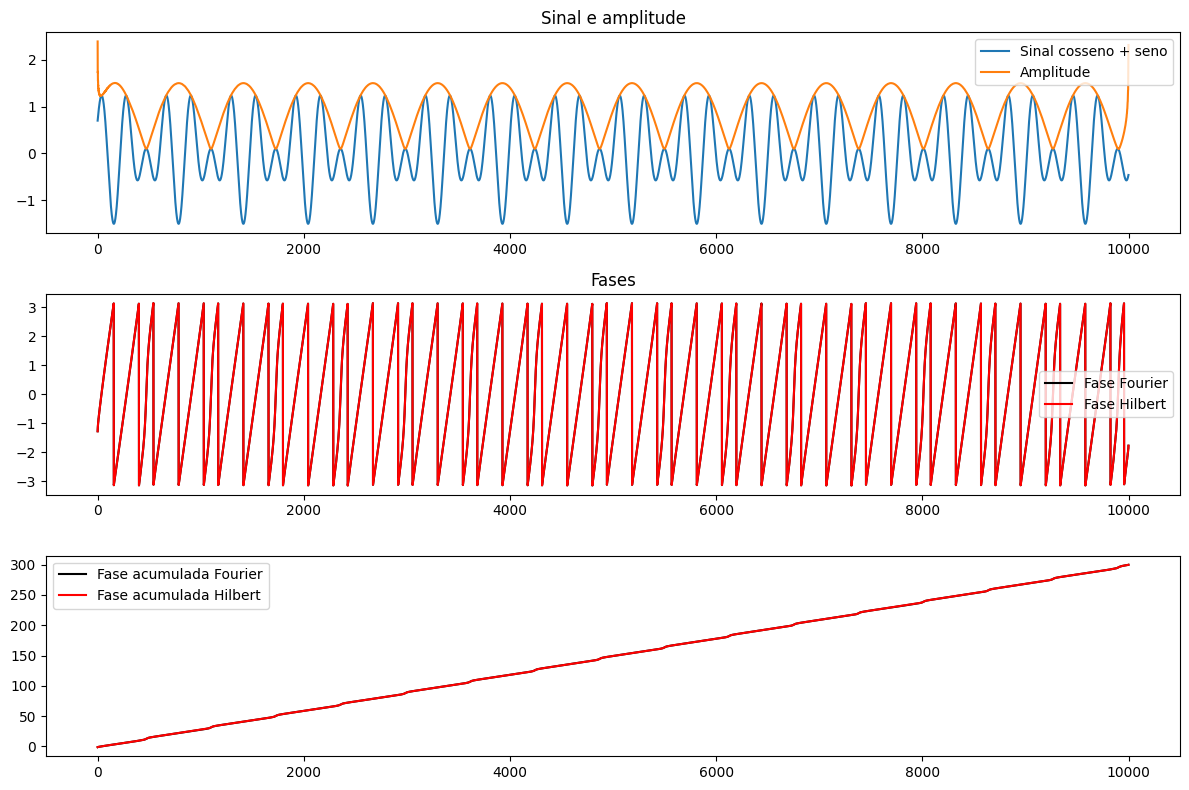

In [15]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(s, label='Sinal cosseno + seno')
#ax[0].plot(sinal_hilbert, label='Sinal Hilbert', color='red')
ax[0].plot(10000*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black', label='Fase Fourier')
ax[1].plot(fase_hilbert, color='red', label='Fase Hilbert')
ax[1].set_title('Fases')
ax[1].legend()

ax[2].plot(unwrapped_phase, color='black', label='Fase acumulada Fourier')
ax[2].plot(unwrapped_phase_hilbert, color='red', label='Fase acumulada Hilbert')
ax[2].legend()

plt.tight_layout()

#se sobrepoem graficamente mas há uma leve diferença nos valores

# Exemplo 5.0.3.

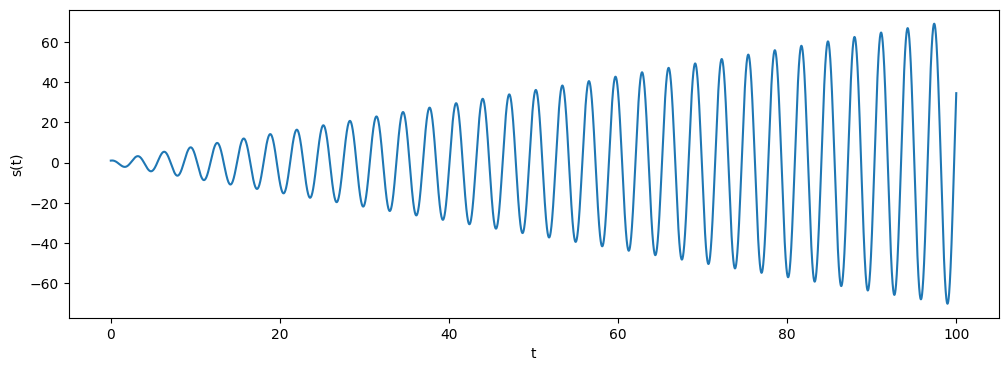

In [16]:
s = (1 + 0.7*t) * np.cos(2*t)

plt.figure(figsize=(12, 4))
plt.xlabel('t')
plt.ylabel('s(t)')
plt.plot(t, s)
plt.show()

In [17]:
z = np.fft.fft(s)
z[0] = 0
z[5000:10000] = np.zeros(5000)

w = np.fft.ifft(z) / np.size(t)

amp = 2*np.abs(w)

fase = np.arctan2(np.imag(w), np.real(w))
unwrapped_phase = np.unwrap(fase)

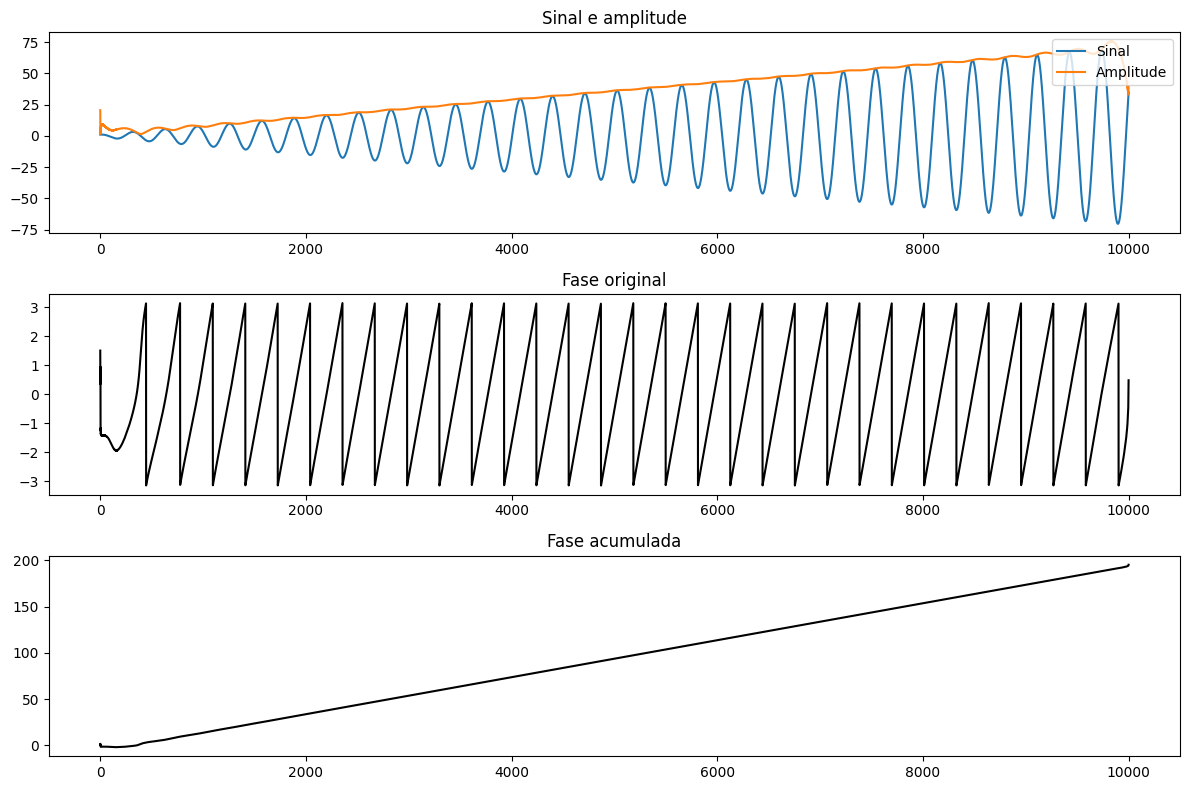

In [18]:
fig, ax = plt.subplots(3,1, figsize=(12,8))

ax[0].plot(s, label='Sinal')
ax[0].plot(10000*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black')
ax[1].set_title('Fase original')

ax[2].plot(unwrapped_phase, color='black')
ax[2].set_title('Fase acumulada')

plt.tight_layout()

# Aplicando à série de soja

In [19]:
from yahoofinancials import YahooFinancials
import pandas as pd

In [20]:
lista_codigos = ['ZS=F']  #soja grão
dados_yahoo = YahooFinancials(lista_codigos)
preco_diario = dados_yahoo.get_historical_price_data('1999-01-01', '2024-02-07', 'daily')
precos_soja = pd.DataFrame({a: {x['formatted_date']: x['adjclose'] for x in preco_diario[a]['prices']} for a in lista_codigos})

# Pré-processamento
precos_soja.reset_index(inplace=True)
precos_soja = precos_soja.rename(columns={'index':'Data'}).copy()
precos_soja.set_index('Data', inplace=True)
precos_soja.index = pd.to_datetime(precos_soja.index)

precos_soja = precos_soja.dropna()

In [25]:
soja_fft = np.fft.fft(precos_soja)
soja_fft[0] = 0
#soja_fft[5800:10800] = np.zeros(5000)  #verificar isso
soja_ifft = np.fft.ifft(soja_fft) / precos_soja.size

amp = 2*np.abs(soja_ifft)

fase = np.arctan2(np.imag(soja_ifft), np.real(soja_ifft))
unwrapped_phase = np.unwrap(fase)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Fase acumulada')

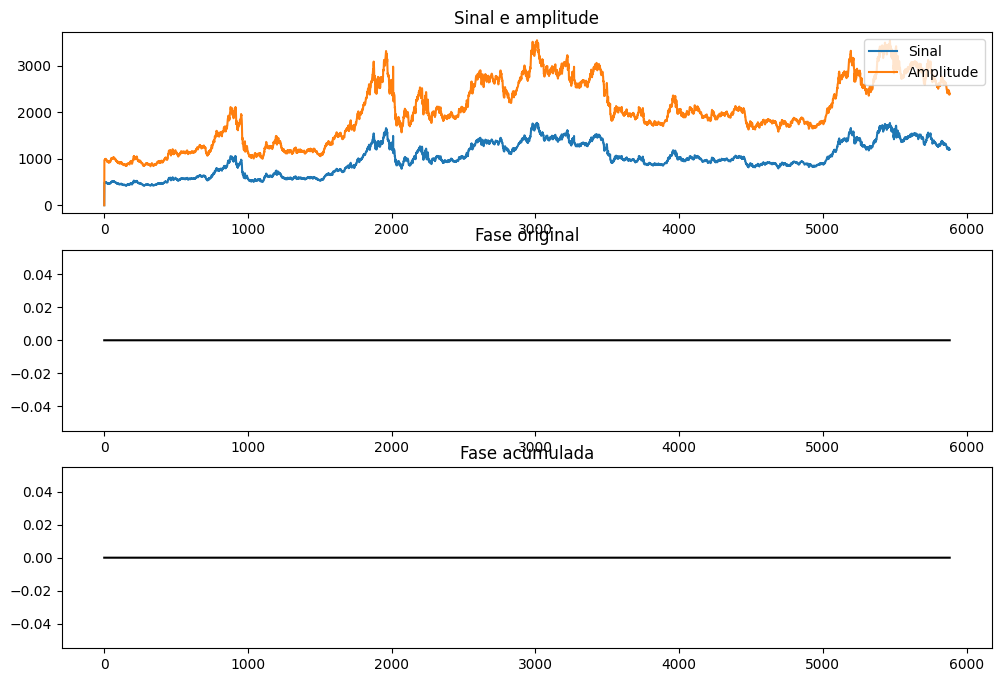

In [26]:
fig, ax = plt.subplots(3,1, figsize=(12,8))    #consertar!!!!

ax[0].plot(soja_fft, label='Sinal')
ax[0].plot(precos_soja.size*amp, label='Amplitude')
ax[0].legend(loc='upper right')
ax[0].set_title('Sinal e amplitude')

ax[1].plot(fase, color='black')
ax[1].set_title('Fase original')

ax[2].plot(unwrapped_phase, color='black')
ax[2].set_title('Fase acumulada')